In [15]:
using Plots
using BenchmarkTools
using DelimitedFiles
using Distributions
using GLM
using DataFrames
using Polynomials

include("serialized_dla_modules.jl")
include("time_complexity_module.jl")

Main.time_complexity

In [2]:
include("fractal_dimension_module.jl")

Main.fractal_dimension

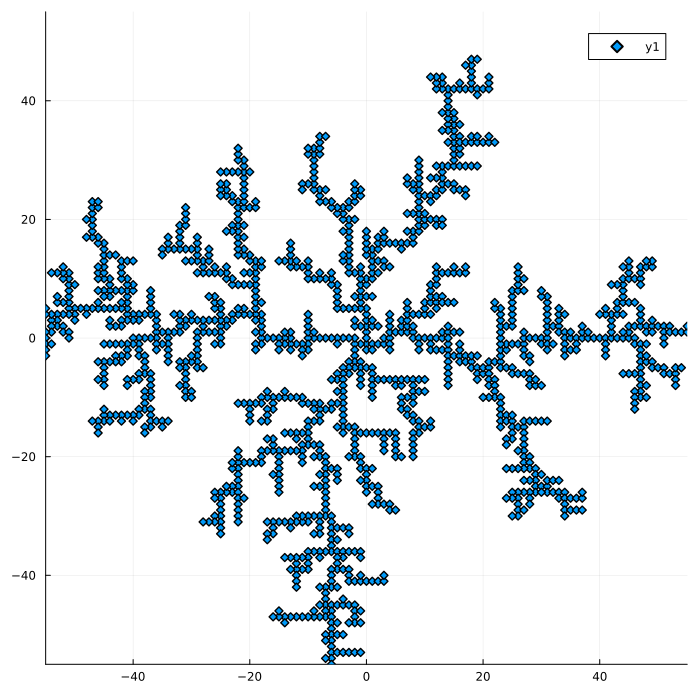

In [3]:
sticking_prob = 1.0
cluster_aggregate = readdlm("raw_data/cluster aggregate for p = $sticking_prob.txt")

scatter(cluster_aggregate[1, : ], cluster_aggregate[2, :], xlims = (-55, 55), 
            ylims = (-55, 55), size = (700, 700), marker = :diamond )

savefig("image_results/sample cluster aggregate.png")

scatter(cluster_aggregate[1, : ], cluster_aggregate[2, :], xlims = (-55, 55), 
            ylims = (-55, 55), size = (700, 700), marker = :diamond )

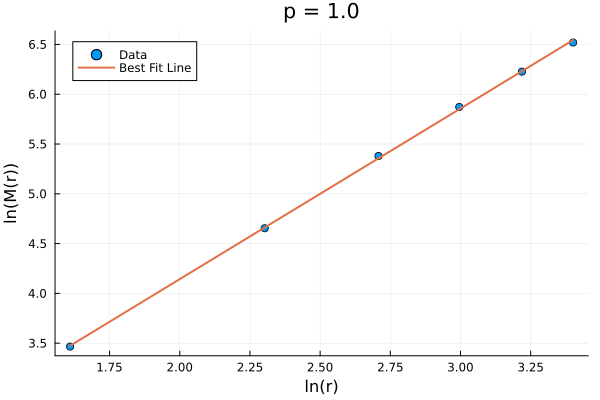

In [4]:
matrix = fractal_dimension.mass_per_radius(cluster_aggregate)
x = log.(matrix[:, 1])
y = log.(matrix[:, 2])

data = DataFrame(x = x, y = y)
model = lm(@formula(y ~ x), data)
intercept, slope = coef(model)

scatter(x, y, label = "Data", xlabel = "ln(r)", ylabel = "ln(M(r))", title = "p = $sticking_prob")
plot!(x, intercept .+ slope .* x, label = "Best Fit Line", lw = 2)

savefig("image_results/log-log plot p = $sticking_prob.png")

scatter(x, y, label = "Data", xlabel = "ln(r)", ylabel = "ln(M(r))", title = "p = $sticking_prob")
plot!(x, intercept .+ slope .* x, label = "Best Fit Line", lw = 2)

In [5]:
println("The slope is equal to $slope")

The slope is equal to 1.7129195147824485


#### Sample Cluster for $p = 0.5$

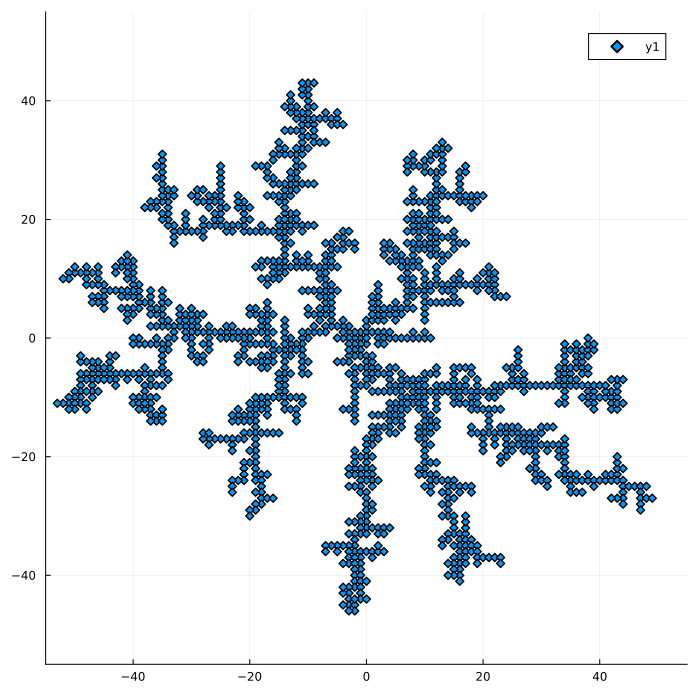

In [6]:
sticking_prob = 0.5
cluster_aggregate = readdlm("raw_data/cluster aggregate for p = $sticking_prob.txt")

scatter(cluster_aggregate[1, : ], cluster_aggregate[2, :], xlims = (-55, 55), 
            ylims = (-55, 55), size = (700, 700), marker = :diamond )


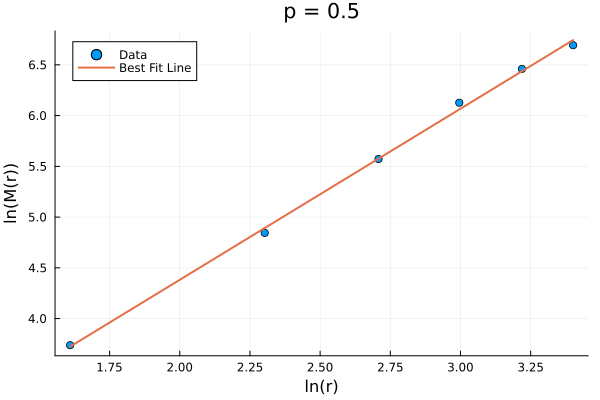

In [7]:
matrix = fractal_dimension.mass_per_radius(cluster_aggregate)
x = log.(matrix[:, 1])
y = log.(matrix[:, 2])

data = DataFrame(x = x, y = y)
model = lm(@formula(y ~ x), data)
intercept, slope = coef(model)

scatter(x, y, label = "Data", xlabel = "ln(r)", ylabel = "ln(M(r))", title = "p = $sticking_prob")
plot!(x, intercept .+ slope .* x, label = "Best Fit Line", lw = 2)

savefig("image_results/log-log plot p = $sticking_prob.png")

scatter(x, y, label = "Data", xlabel = "ln(r)", ylabel = "ln(M(r))", title = "p = $sticking_prob")
plot!(x, intercept .+ slope .* x, label = "Best Fit Line", lw = 2)

In [8]:
println("The slope is equal to $slope")

The slope is equal to 1.6856242070081344


#### Sample Cluster for $p = 0.25$

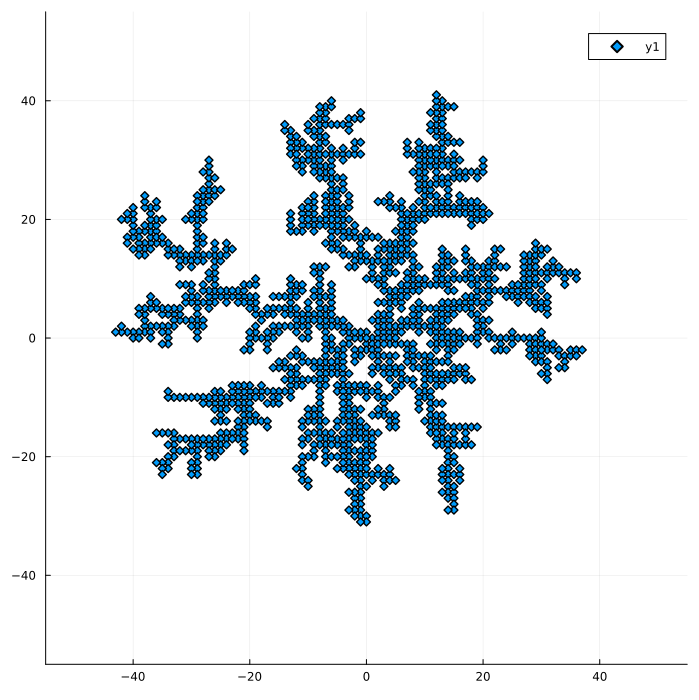

In [9]:
sticking_prob = 0.25
cluster_aggregate = readdlm("raw_data/cluster aggregate for p = $sticking_prob.txt")

scatter(cluster_aggregate[1, : ], cluster_aggregate[2, :], xlims = (-55, 55), 
            ylims = (-55, 55), size = (700, 700), marker = :diamond )

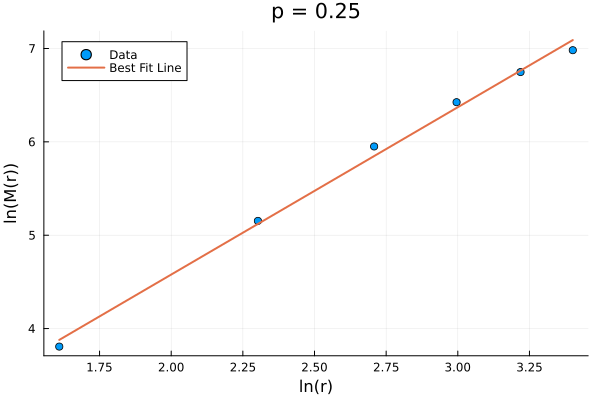

In [10]:
matrix = fractal_dimension.mass_per_radius(cluster_aggregate)
x = log.(matrix[:, 1])
y = log.(matrix[:, 2])

data = DataFrame(x = x, y = y)
model = lm(@formula(y ~ x), data)
intercept, slope = coef(model)

scatter(x, y, label = "Data", xlabel = "ln(r)", ylabel = "ln(M(r))", title = "p = $sticking_prob")
plot!(x, intercept .+ slope .* x, label = "Best Fit Line", lw = 2)

savefig("image_results/log-log plot p = $sticking_prob.png")

scatter(x, y, label = "Data", xlabel = "ln(r)", ylabel = "ln(M(r))", title = "p = $sticking_prob")
plot!(x, intercept .+ slope .* x, label = "Best Fit Line", lw = 2)

In [11]:
println("The slope is equal to $slope")

The slope is equal to 1.7926547303507971


#### Sample Cluster for $p = 0.1$

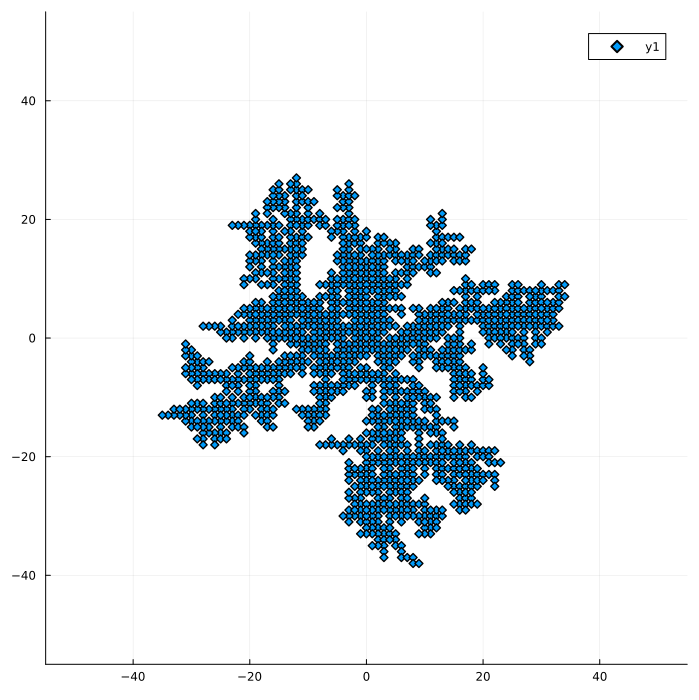

In [12]:
sticking_prob = 0.1
cluster_aggregate = readdlm("raw_data/cluster aggregate for p = $sticking_prob.txt")

scatter(cluster_aggregate[1, : ], cluster_aggregate[2, :], xlims = (-55, 55), 
            ylims = (-55, 55), size = (700, 700), marker = :diamond )

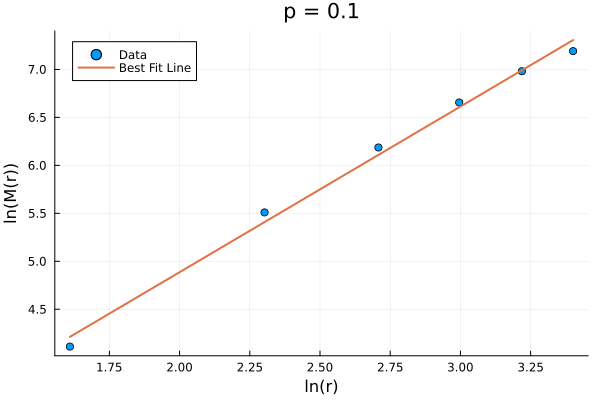

In [13]:
matrix = fractal_dimension.mass_per_radius(cluster_aggregate)
x = log.(matrix[:, 1])
y = log.(matrix[:, 2])

data = DataFrame(x = x, y = y)
model = lm(@formula(y ~ x), data)
intercept, slope = coef(model)

scatter(x, y, label = "Data", xlabel = "ln(r)", ylabel = "ln(M(r))", title = "p = $sticking_prob")
plot!(x, intercept .+ slope .* x, label = "Best Fit Line", lw = 2)

savefig("image_results/log-log plot p = $sticking_prob.png")

scatter(x, y, label = "Data", xlabel = "ln(r)", ylabel = "ln(M(r))", title = "p = $sticking_prob")
plot!(x, intercept .+ slope .* x, label = "Best Fit Line", lw = 2)

In [14]:
println("The slope is equal to $slope")

The slope is equal to 1.7265684454102197


## Plotting Time Complexity

In [27]:
serial_run_time = zeros(7,4)
for i = 500:500:3500
    particle_number = i
    serial_time = readdlm("raw_data/serial_time for up to particle_number = $particle_number.txt")
    writedlm("raw_data/serial_time for up to particle_number = $particle_number.txt", serial_time)
    j = Int(i/500)
    serial_run_time[j,:] = serial_time
end

serial_run_time_stats = time_complexity.run_time_stats(serial_run_time)

7×3 Matrix{Float64}:
  500.0    1.21091   0.460901
 1000.0   10.273     1.74755
 1500.0   40.4775   23.0147
 2000.0   74.8837   10.1176
 2500.0  135.924    33.6169
 3000.0  117.953    50.0148
 3500.0  186.419    57.6462

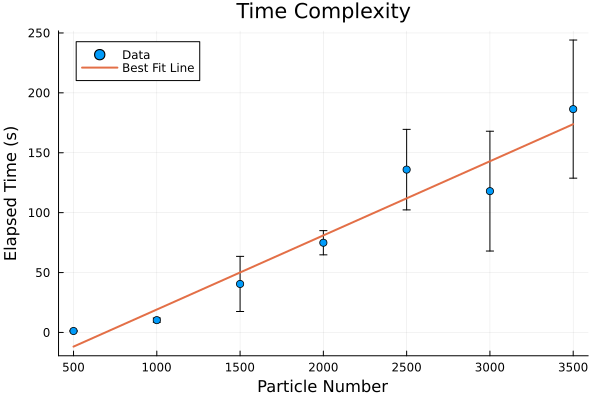

In [31]:
x_stats = serial_run_time_stats[:,1]
y_stats = serial_run_time_stats[:,2]
se = serial_run_time_stats[:,3]
data = DataFrame(x = x_stats, y = y_stats)
model = lm(@formula(y ~ x), data)
intercept, slope = coef(model)

y_best = intercept .+ slope .* x_stats
scatter(x_stats, y_stats, yerror=se, label = "Data", xlabel = "Particle Number", ylabel = "Elapsed Time (s)", title = "Time Complexity")
plot!(x_stats, y_best, label = "Best Fit Line", lw = 2)

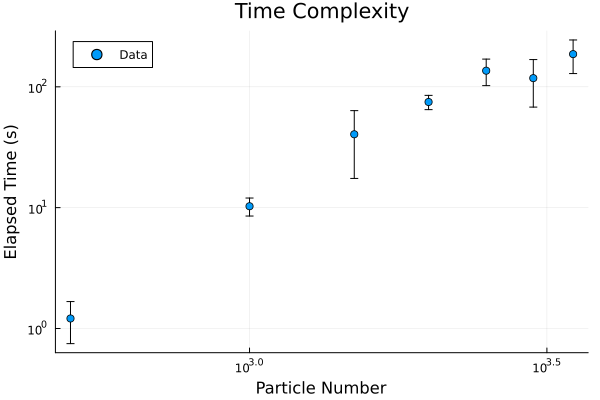

In [36]:
x_stats = (serial_run_time_stats[:,1])
y_stats = (serial_run_time_stats[:,2])
se = (serial_run_time_stats[:,3])
y_best = intercept .+ slope .* x_stats
scatter(x_stats, y_stats, yerror=se, label = "Data", 
        xaxis=:log, yaxis=:log,
        xlabel = "Particle Number", ylabel = "Elapsed Time (s)", 
        title = "Time Complexity")

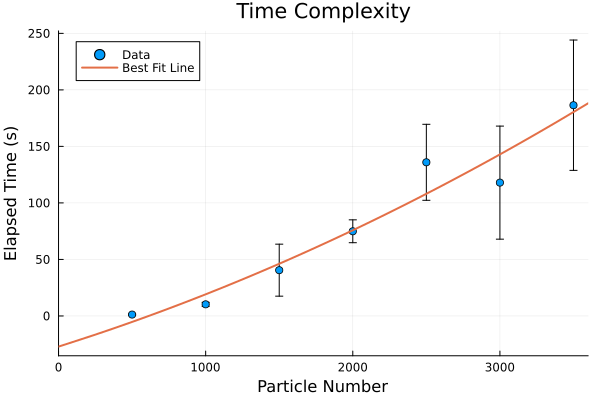

In [34]:
y_best = Polynomials.fit(x_stats,y_stats,2)
scatter(x_stats, y_stats, yerror=se, label = "Data", 
        xlabel = "Particle Number", ylabel = "Elapsed Time (s)", 
        title = "Time Complexity")
plot!(y_best, label = "Best Fit Line", xlims=[0,3600], lw = 2)